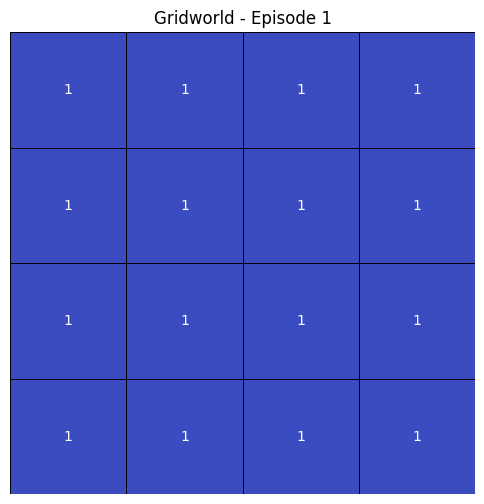

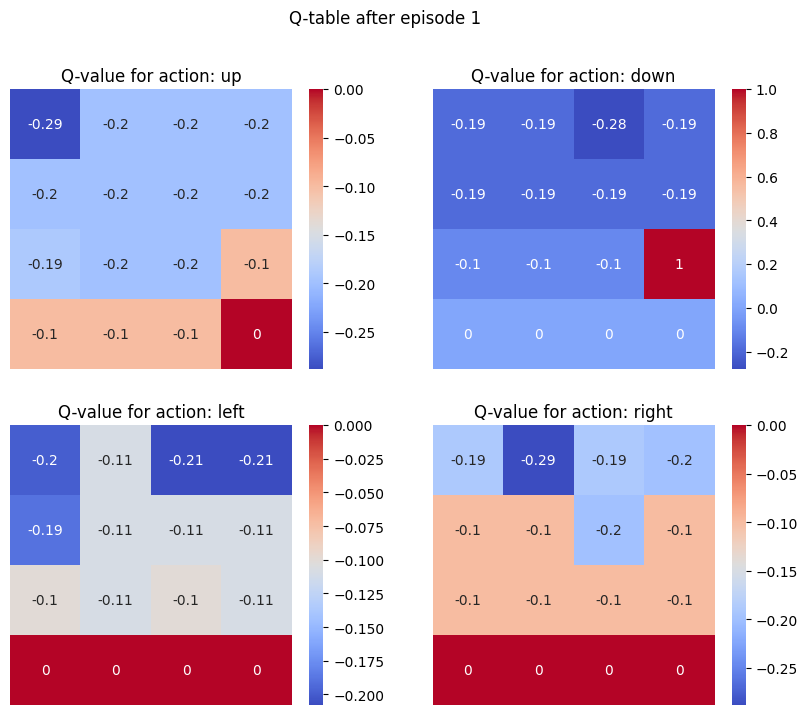

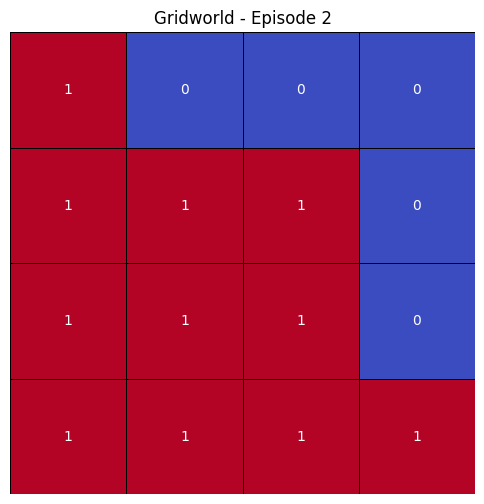

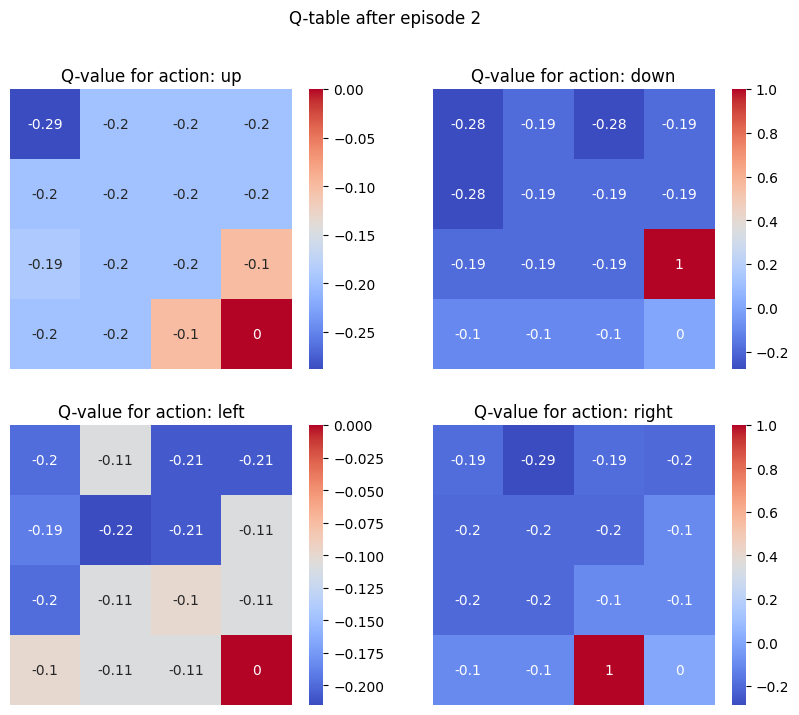

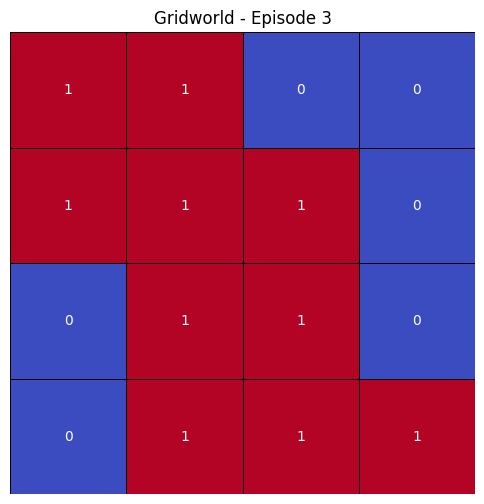

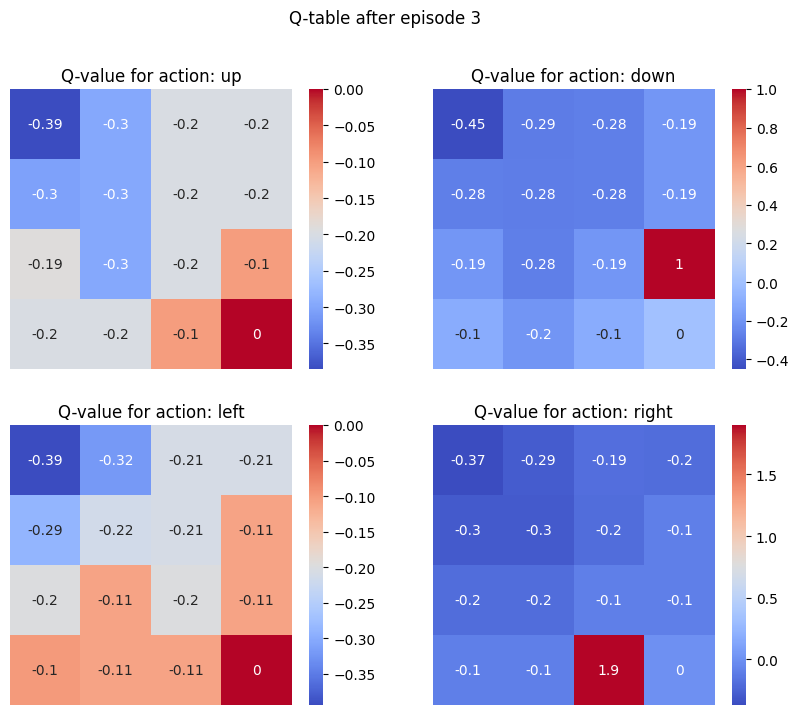

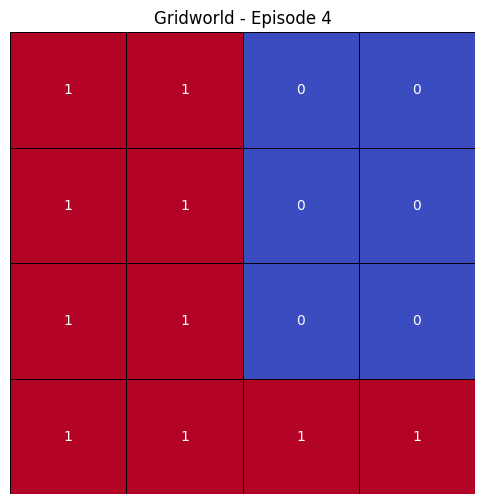

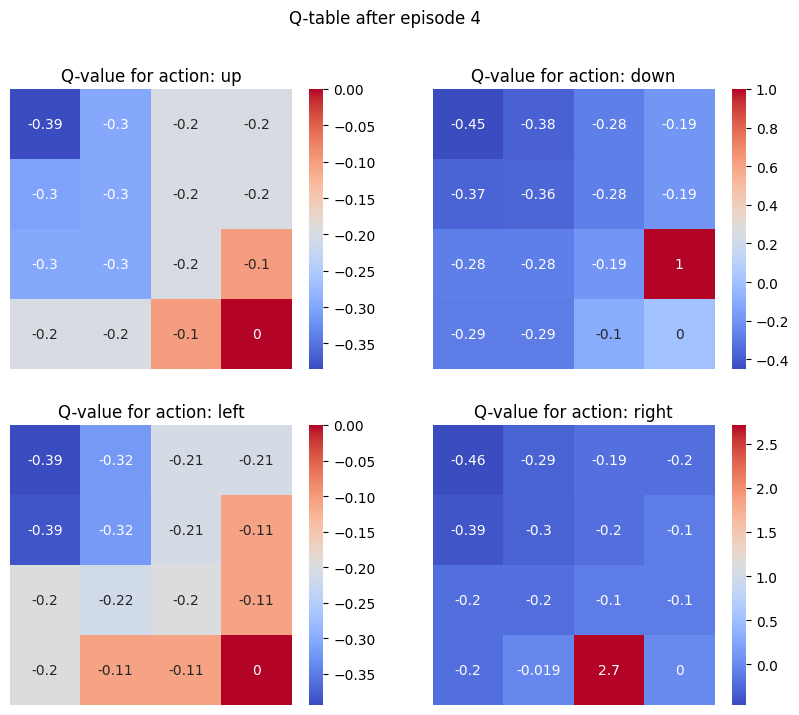

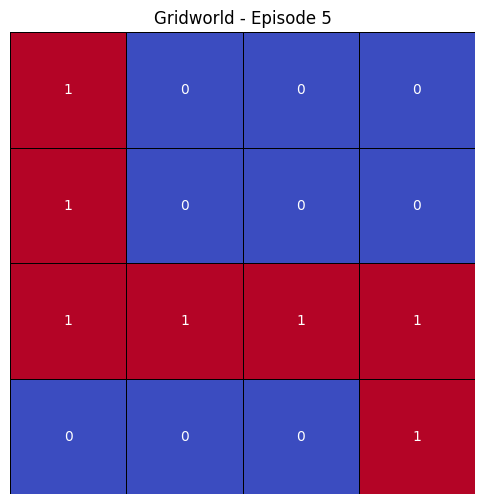

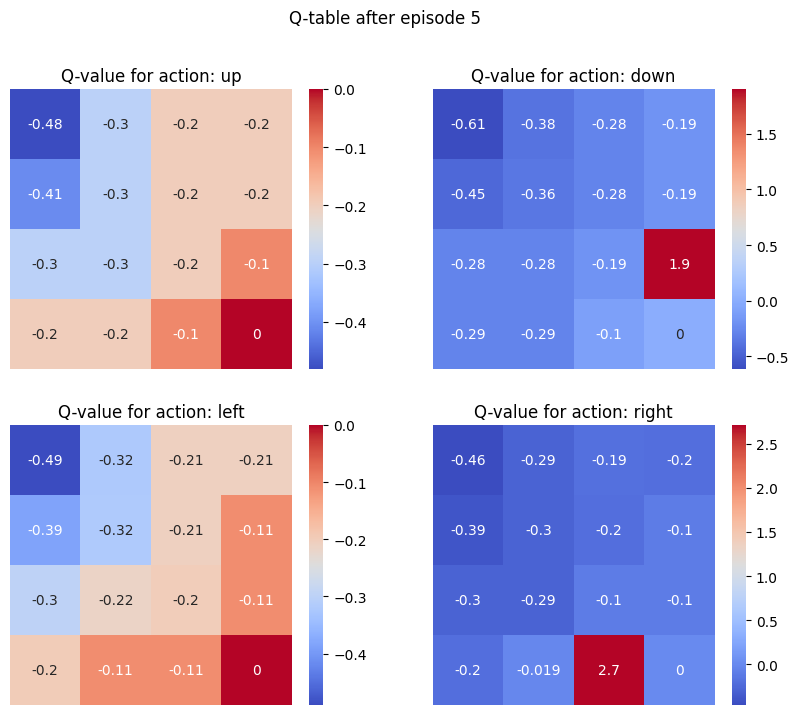

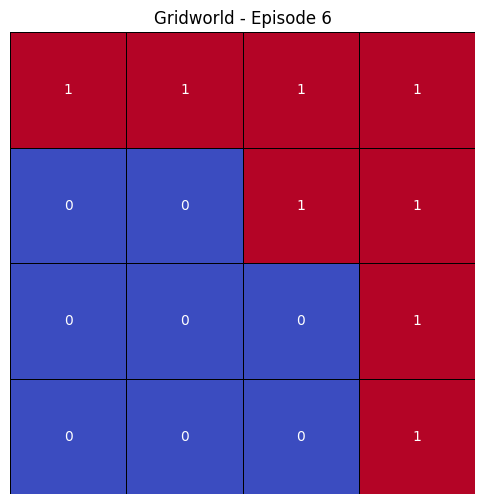

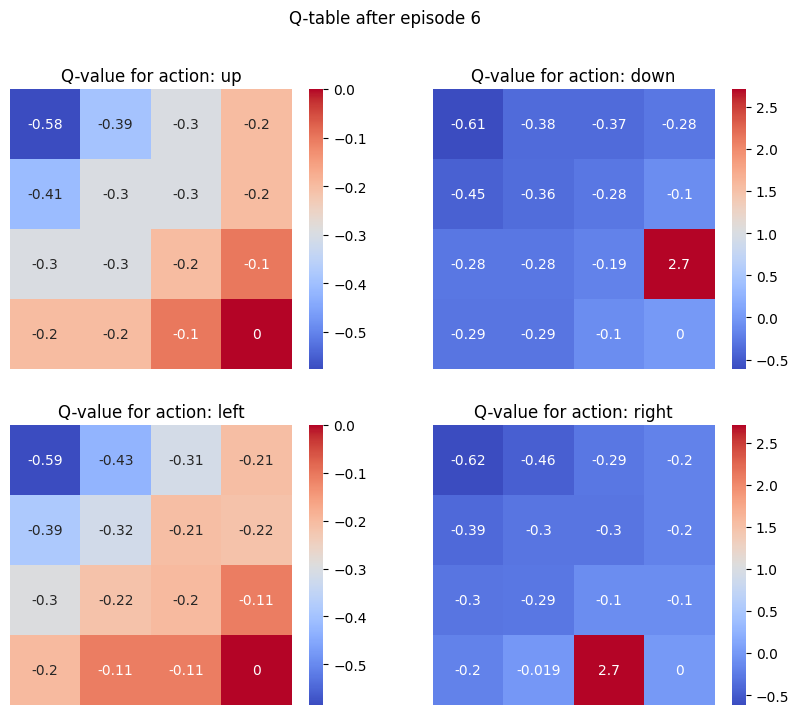

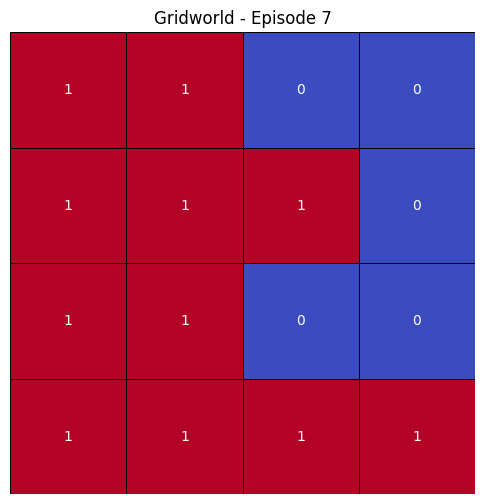

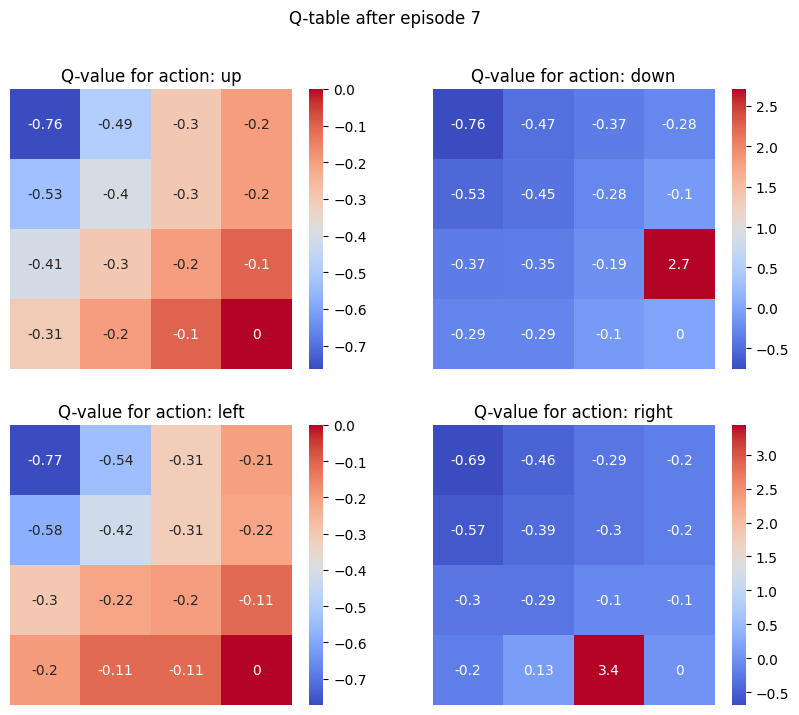

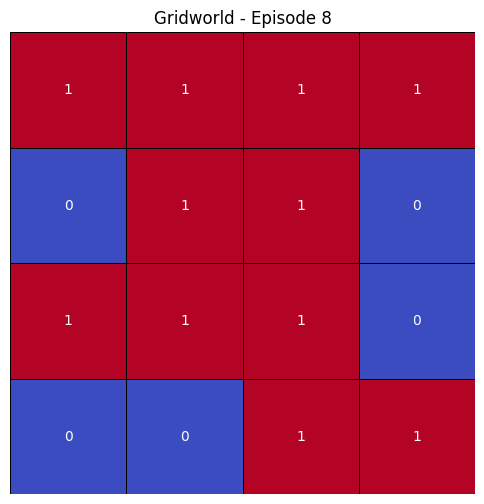

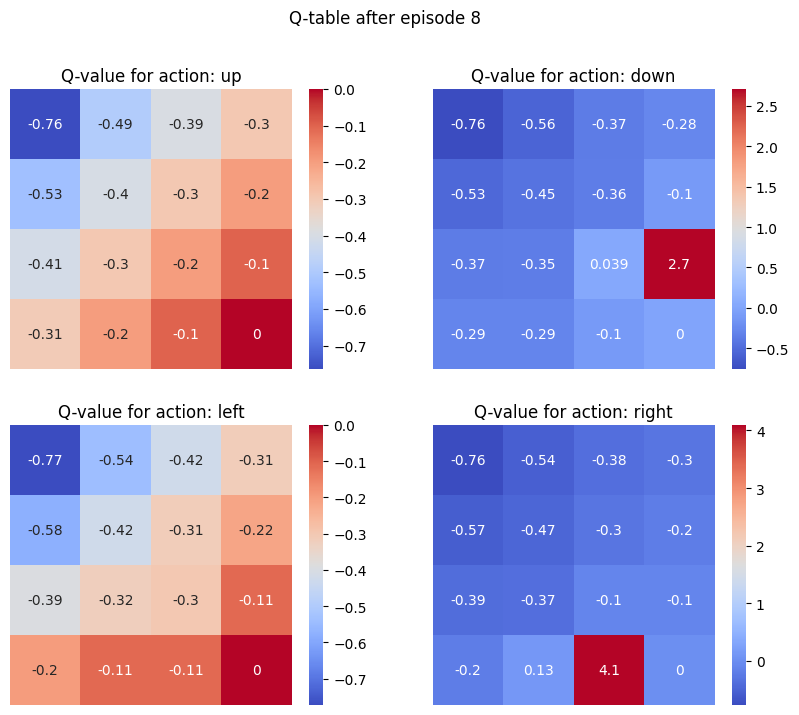

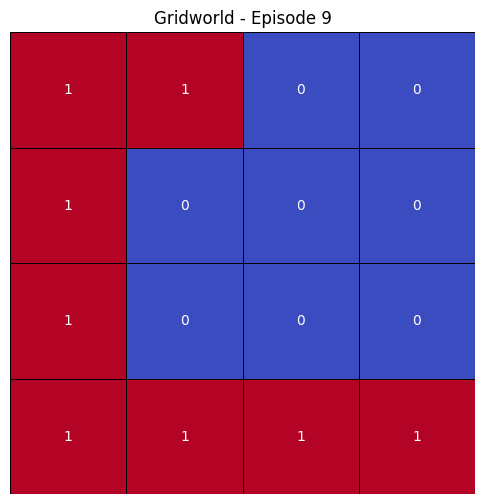

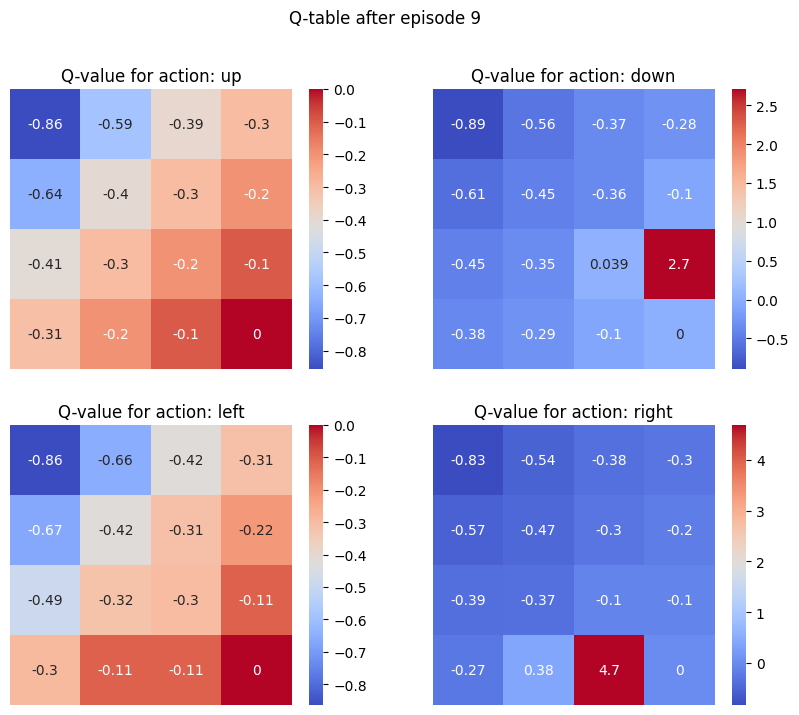

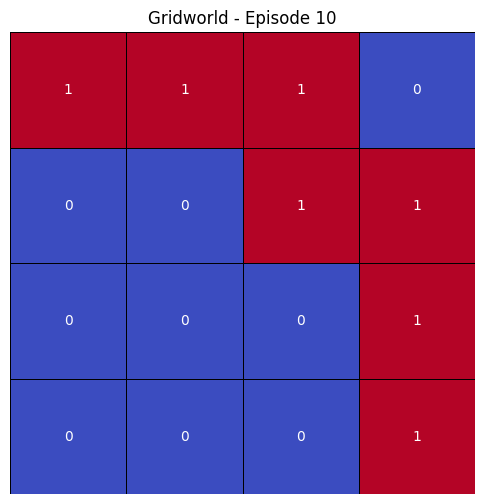

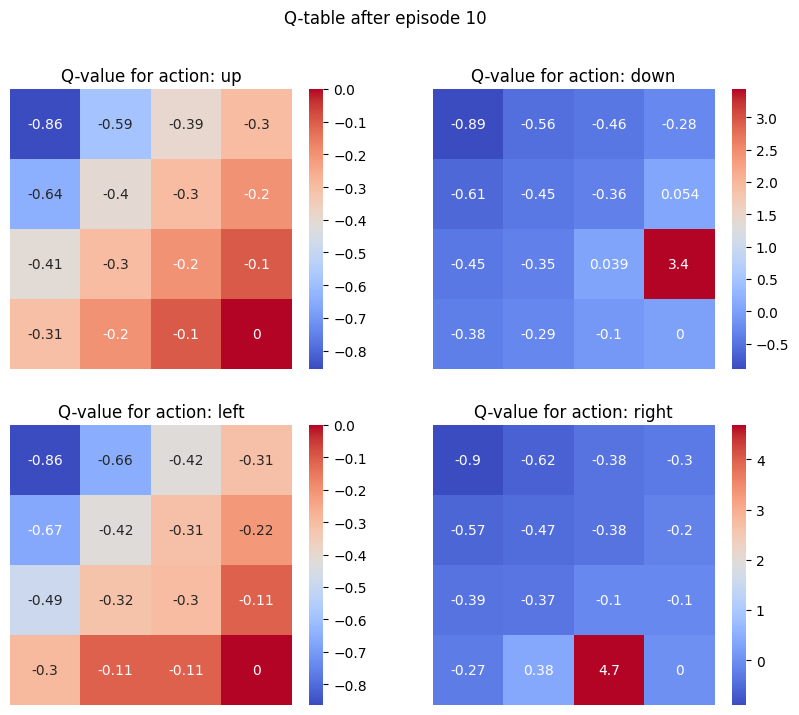

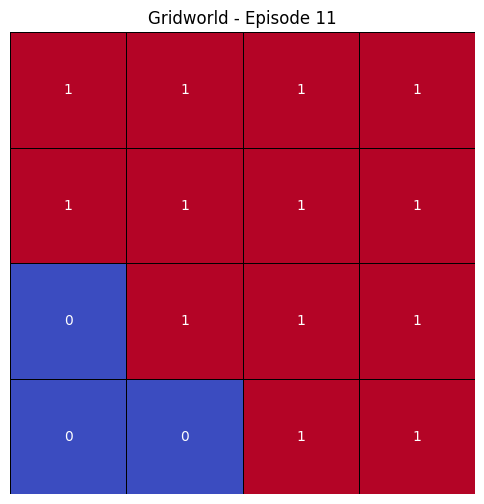

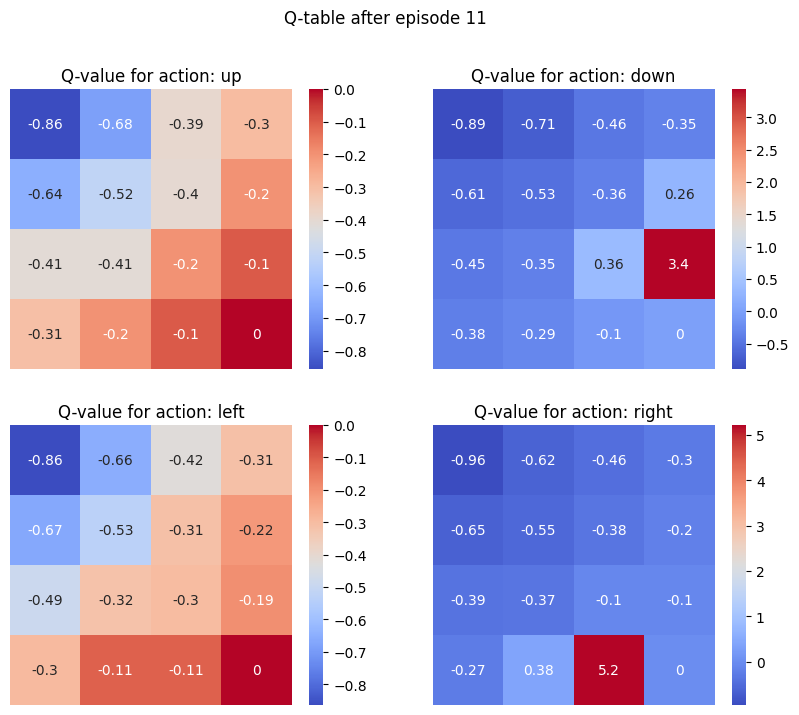

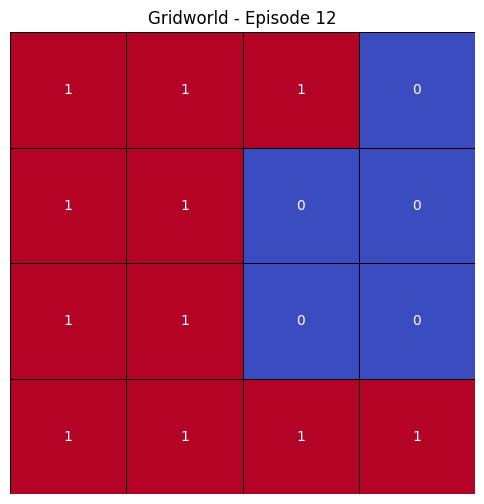

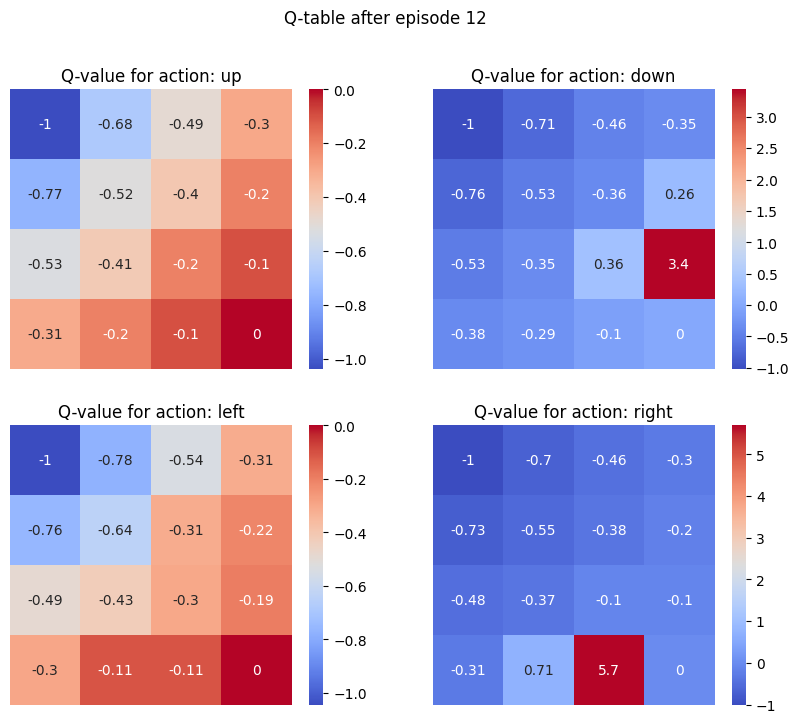

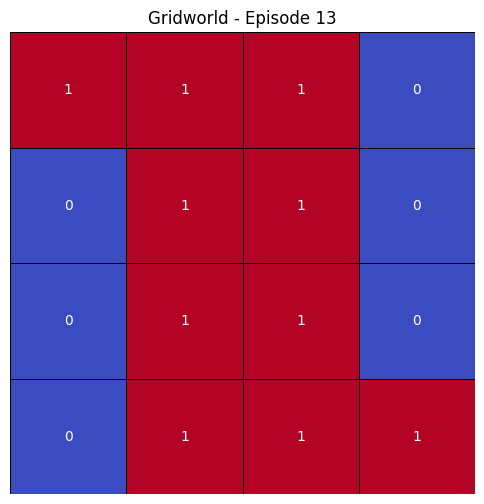

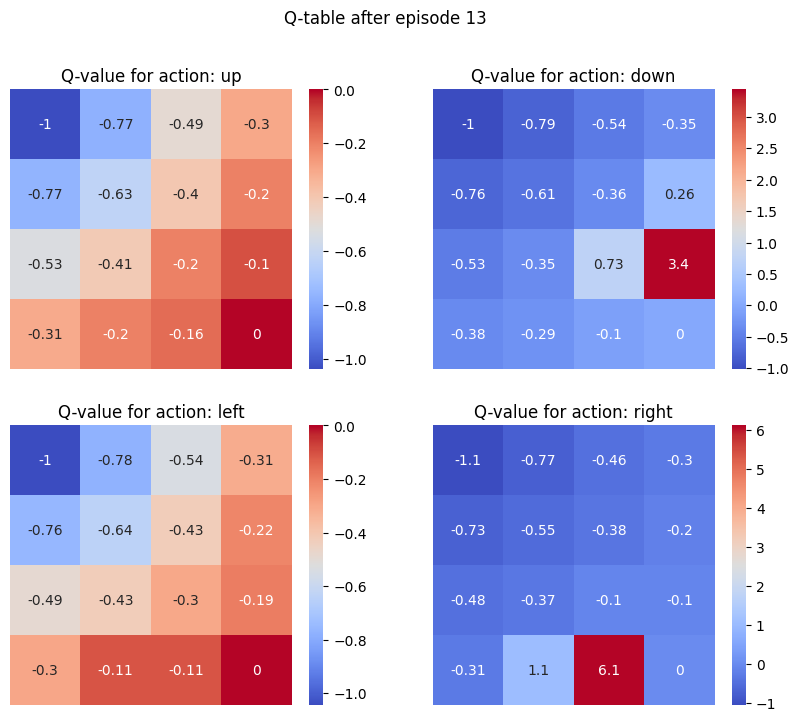

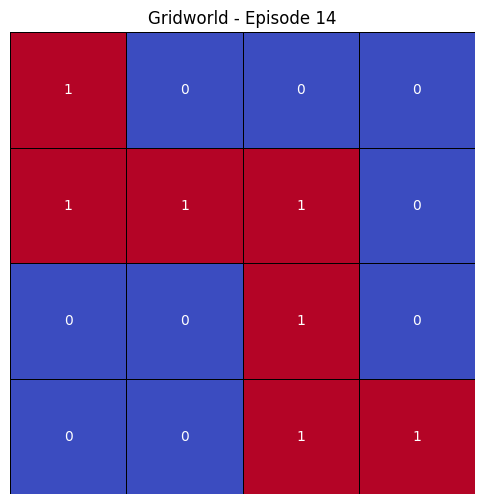

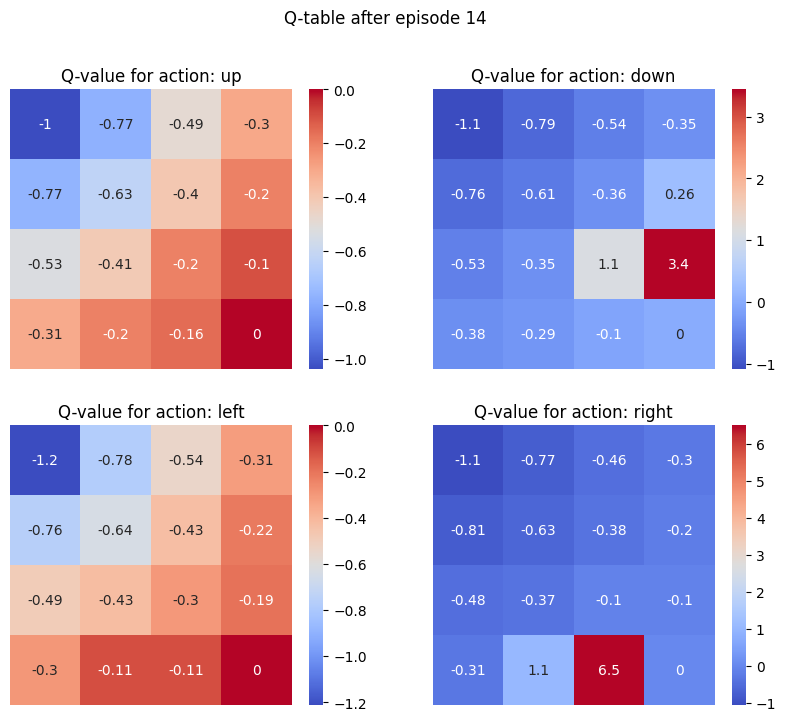

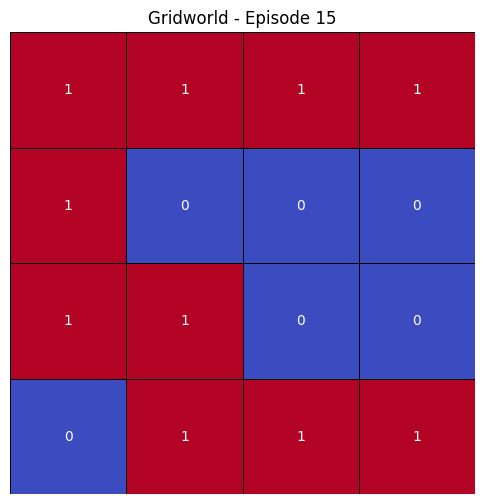

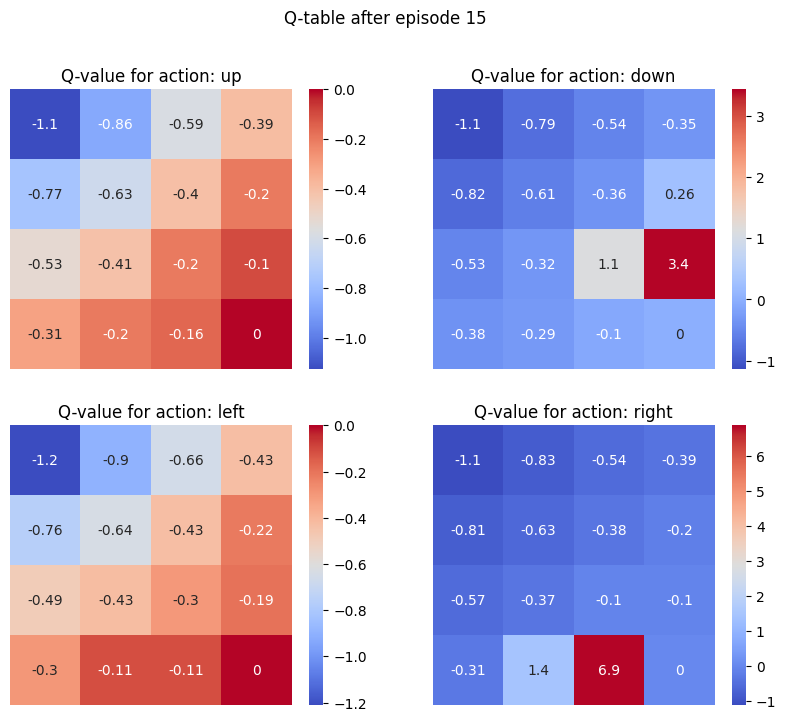

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Gridworld setup
grid_size = 4
goal_state = (3, 3)
num_actions = 4
actions = ['up', 'down', 'left', 'right']

# Initialize Q-table
Q = np.zeros((grid_size, grid_size, num_actions))

# Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 15

# Define rewards
rewards = np.full((grid_size, grid_size), -1)
rewards[goal_state] = 10

# Define possible actions
action_deltas = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

def is_valid_state(state):
    x, y = state
    return 0 <= x < grid_size and 0 <= y < grid_size

def get_next_state(state, action):
    delta = action_deltas[action]
    next_state = (state[0] + delta[0], state[1] + delta[1])
    return next_state if is_valid_state(next_state) else state

def get_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)  # Explore
    else:
        return actions[np.argmax(Q[state[0], state[1]])]  # Exploit

def plot_gridworld(path, goal_state, title=""):
    grid = np.zeros((grid_size, grid_size))
    grid[goal_state] = 0.5  # Goal state
    for (i, j) in path:
        grid[i, j] = 1.0  # Agent's path
    plt.figure(figsize=(6, 6))
    sns.heatmap(grid, annot=True, cmap="coolwarm", cbar=False, linewidths=0.5, linecolor='black', xticklabels=False, yticklabels=False)
    plt.title(title)
    plt.show()

# Q-learning algorithm
for episode in range(num_episodes):
    state = (0, 0)
    path = [state]

    while state != goal_state:
        action = get_action(state)
        next_state = get_next_state(state, action)
        reward = rewards[next_state]

        action_idx = actions.index(action)
        best_next_action = np.argmax(Q[next_state[0], next_state[1]])

        Q[state[0], state[1], action_idx] += alpha * (
            reward + gamma * Q[next_state[0], next_state[1], best_next_action] - Q[state[0], state[1], action_idx])

        state = next_state
        path.append(state) # type: ignore

    # Plot Gridworld with agent's path
    plot_gridworld(path, goal_state, title=f'Gridworld - Episode {episode + 1}')

    # Plot Q-table after each episode
    plt.figure(figsize=(10, 8))
    for i, action in enumerate(actions):
        plt.subplot(2, 2, i+1)
        sns.heatmap(Q[:, :, i], annot=True, cmap="coolwarm", xticklabels=False, yticklabels=False)
        plt.title(f'Q-value for action: {action}')
    plt.suptitle(f'Q-table after episode {episode + 1}')
    plt.show()
